# Hand-written Digit Classification-Prediction Analysis

<hr style="border:2px solid gray">

## Objective: To predict the classification accuracy of hand-written digits

## Import Library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import data

In [12]:
from sklearn.datasets import load_digits

In [13]:
df=load_digits()

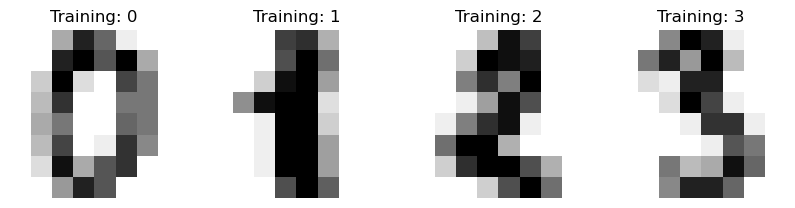

In [18]:
_, axes= plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title("Training: %i" %label)

## Data preprocessing

### Flatten image

In [16]:
df.images.shape

(1797, 8, 8)

In [19]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [20]:
df.images[0].shape

(8, 8)

In [22]:
len(df.images)

1797

In [31]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [32]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [33]:
data[0].shape

(64,)

In [34]:
data.shape

(1797, 64)

### Scaling image data

In [35]:
data.min()

0.0

In [36]:
data.max()

16.0

In [37]:
data=data/16

In [39]:
data.min()

0.0

In [40]:
data.max()

1.0

In [41]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Train test split data

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,df.target,test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## Random forest model

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

## Predict Test data

In [50]:
y_pred=rf.predict(X_test)
y_pred

array([8, 9, 5, 7, 8, 7, 5, 0, 5, 4, 6, 9, 4, 6, 2, 8, 8, 3, 5, 0, 7, 0,
       2, 7, 8, 6, 7, 1, 9, 7, 8, 5, 0, 3, 8, 5, 9, 5, 8, 7, 1, 2, 9, 4,
       9, 7, 0, 2, 6, 1, 4, 2, 0, 4, 2, 5, 6, 3, 7, 7, 9, 4, 6, 1, 4, 0,
       5, 5, 5, 3, 8, 0, 1, 4, 3, 3, 7, 3, 0, 0, 4, 6, 0, 5, 7, 8, 9, 8,
       6, 2, 2, 6, 8, 8, 5, 4, 6, 2, 0, 2, 5, 7, 1, 0, 8, 7, 4, 8, 8, 2,
       2, 5, 2, 1, 8, 3, 3, 0, 5, 2, 0, 8, 6, 0, 6, 1, 6, 1, 6, 8, 2, 8,
       5, 1, 4, 2, 8, 9, 8, 0, 6, 6, 4, 1, 5, 7, 0, 4, 3, 4, 2, 9, 1, 7,
       7, 3, 4, 5, 3, 8, 0, 9, 4, 7, 8, 7, 0, 1, 2, 3, 7, 3, 2, 0, 3, 7,
       0, 6, 5, 1, 6, 3, 4, 5, 4, 9, 3, 3, 8, 2, 8, 7, 8, 0, 9, 6, 4, 3,
       0, 8, 1, 0, 4, 1, 0, 3, 6, 2, 5, 1, 8, 6, 6, 3, 7, 5, 2, 2, 2, 8,
       1, 7, 5, 2, 2, 0, 0, 6, 8, 3, 2, 5, 8, 1, 6, 4, 9, 7, 2, 4, 3, 4,
       0, 1, 3, 9, 2, 8, 8, 8, 9, 7, 4, 1, 2, 6, 2, 9, 7, 0, 3, 5, 2, 7,
       3, 2, 5, 6, 4, 6, 9, 4, 5, 5, 0, 5, 2, 0, 1, 2, 5, 5, 8, 1, 6, 0,
       1, 2, 0, 9, 4, 4, 5, 3, 2, 6, 5, 4, 5, 1, 9,

## Model accuracy

In [52]:
from sklearn.metrics import confusion_matrix , classification_report

In [53]:
confusion_matrix(y_test,y_pred)

array([[60,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 59,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 58,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 45,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 59,  1],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  1, 45]], dtype=int64)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.94      1.00      0.97        49
           2       1.00      1.00      1.00        59
           3       0.96      0.96      0.96        46
           4       1.00      1.00      1.00        58
           5       0.96      1.00      0.98        55
           6       1.00      0.96      0.98        47
           7       0.98      1.00      0.99        54
           8       0.97      0.92      0.94        64
           9       0.96      0.94      0.95        48

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



## Explanation


Hand-written digit classification is the process of identifying a digit from an image of handwritten characters. This is an important problem in image processing and machine learning, with numerous real-world applications.
In this task, we will use the RandomForestClassifier algorithm to classify and predict hand-written digits using the Python programming language. The RandomForestClassifier is a popular classification algorithm in machine learning, which is based on the concept of decision trees.
Here are the steps to perform hand-written digit classification using the RandomForestClassifier algorithm in Python:
Step 1: Import the required libraries and dataset.
Step 2: Train the RandomForestClassifier model.
Step 3: Evaluate the model.
Step 4: Make predictions.